#Init

El siguiente Notebook fue realizado con ```Python```, usando las librerías ```Numpy```, ```Matplotlib``` y ```Sympy```, además se condtruyó un módulo de ayuda llamado ```funcionesUtiles.py```.

In [6]:
import numpy as np
import matplotlib.pyplot as mp
import sympy as sp
from sympy import simplify,Eq,cos,sin,diff
from funcionesUtiles import *
sp.init_printing()

# 1. Horizonte de eventos

El horizonte de eventos es la frontera del agujero negro, esta delimita la región del espacio tiempo que no puede comunicarse con observadores lejano. El horizonte de eventos es el resultado de resolver la ecuación
\begin{equation}
  g^{rr}=0,
\end{equation}
donde $g$ es la métrica de la solución bajo estudio.

En el presente Notebook se estudiaran algunas propiedades de una solución estática para la gravedad masiva dRGT, la cual viene dada de la forma 
$$ds^2 = -F(r)dt^2+\dfrac{1}{F(r)}dr^2+r^2d\Omega^2,$$

con $F(r)=1-\dfrac{2M}{r}+\dfrac{\Lambda}{3}r^2+\gamma r+\zeta$. Además, $M$, $\Lambda$, $\gamma$ y $\zeta$ son parametros con $M$ la masa del agujero negro y $\Lambda$ la constante cosmológica. 

## 1.1. Definición de coordenadas y variables

Inicialmente, se definen las coordenadas con las que se trabajarán, estas son las coordenadas esféricas $(t, r, \theta, \phi)$, adicionalmente se inicializan los parámetros $\Lambda$, $\gamma$ y $\zeta$, para posteriormente inicializar los parámetros $M$, $\alpha$, $\beta$, $c$ y $m_g$ (la masa del gravitón), todo usando la función ```symbols()``` de ```Sympy```.

In [13]:
t,r,theta,phi = sp.symbols("t r \\theta \\phi")
Lambda,gamma,zeta = sp.symbols(r"\Lambda \gamma \zeta")
m, alpha, beta, m_g, c = sp.symbols(r" m \alpha \beta m_g c")

Los parámetos $\Lambda$, $\gamma$ y $\zeta$ dependen de los parámetros $\alpha$, $\beta$, $c$ y $m_g$  como sigue 

\begin{gather}
    \Lambda=3m_g^2(1+\alpha+\beta), \\
    \gamma=-cm_g^2(1+2\alpha+3\beta), \\
    \zeta=c^2m_g^2(\alpha+3\beta).
\end{gather}

Por tanto se hace explicita la dependencia con estas en el código.

In [14]:
Lambda = 3*m_g**2*(1+alpha+beta)
Lambda

In [15]:
gamma = -c*m_g**2*(1+2*alpha+3*beta)
gamma

In [16]:
zeta = c**2*m_g**2*(alpha + 3*beta)
zeta

## 1.2. Métrica $g_{\mu\nu}$

Dada la forma que tiene el elemento de línea expresado al inicio la métrica $g_{\mu\nu}$, en su representación matricial, vendra dada por

In [23]:
f=1-2*m/r+Lambda*r**2/3+gamma*r+zeta

g=sp.Matrix([[0 for i in range(4)] for i in range(4)])
g[0,0]=-f
g[1,1]=1/f
g[2,2]=r**2
g[3,3]=r**2*sin(theta)**2
g

⎡   2    2                           2                              2⋅m      2
⎢- c ⋅m_g ⋅(\alpha + 3⋅\beta) + c⋅m_g ⋅r⋅(2⋅\alpha + 3⋅\beta + 1) + ─── - m_g 
⎢                                                                    r        
⎢                                                                             
⎢                                                                             
⎢                                                    0                        
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                    0                        
⎢                                                   

Para calcular la métrica en su forma contravariante ($g^{\mu\nu}$) se usó el método ```Matrix.inv()``` de ```Sympy```, la cual queda en la forma que sigue

In [ ]:
simplify(g.inv())

⎡                     -3⋅r                                                    
⎢────────────────────────────────────────────────                     0       
⎢         3             2                                                     
⎢\Lambda⋅r  + 3⋅\gamma⋅r  + 3⋅\zeta⋅r - 6⋅m + 3⋅r                             
⎢                                                                             
⎢                                                           2                 
⎢                                                  \Lambda⋅r                  
⎢                       0                          ────────── + \gamma⋅r + \ze
⎢                                                      3                      
⎢                                                                             
⎢                                                                             
⎢                       0                                             0       
⎢                                                   

Notando que $$g^{rr}=F(r),$$
luego las soluciones de horizonte de eventos vendrá dada por 
$$F(r_H)=1-\dfrac{2M}{r}+\dfrac{\Lambda}{3}r^2+\gamma r+\zeta=0.$$

Multiplicando a ambos lados de la igualdad por $r$ y escribiendo la expresión en términos de $\alpha$ y $\beta$ se obtiene lo siguiente

In [ ]:
simplify(r*f)

## 1.3. Conteo del número de soluciones en un espacio $(\alpha,\beta)$

Es posible realizar un estudio del horizonte de eventos en el espacio $(\alpha$-$\beta)$. Esto para corroborar los valores de los parámetros $\alpha$ y $\beta$ donde existe al menos una solución para horizonte de eventos, es decir, $r_H\in \mathbb{R}$ y $r_H>0$.

Para esto, se escogio una región arbitraria del espacio comprendida entre $\alpha \in [-10, 15]$ y $\beta\in[-1,6]$, esto se hizo usando la función ```linspace()``` de ```Numpy```.

In [ ]:
alphas=np.linspace(-10,15,100)
betas=np.linspace(-1,6,100)

Definiendo la función a resolver, ajustando el valor de los parámetros $M=c=m_g=1$ para mayor facilidad, esta función queda escrita como sigue

In [ ]:
f_1=sp.expand(subs(r*f,(m_g,1),(c,1),(m,1)))
f_1

Dada la ecuación anterior, se usa la función ```findSolutions()``` definida en el script ```funcionesUtiles.py``` el cual cuenta el número de soluciones de horizonte de eventos para dados valores de  $\alpha$ y $\beta$.

In [ ]:
sols_M1_0=findSolutions(f=f_1,numOfSols=3,domAndArray=[alpha,alphas],imgAndArray=[beta,betas])

Una vez se tiene el conteo de las soluciones guardadas en el arreglo ```sols_M1_0``` se gráfica usando la función ```scatter()``` del múdulo ```pyplot``` de ```Matplotlib```, obteniendo la siguiente gráfica 

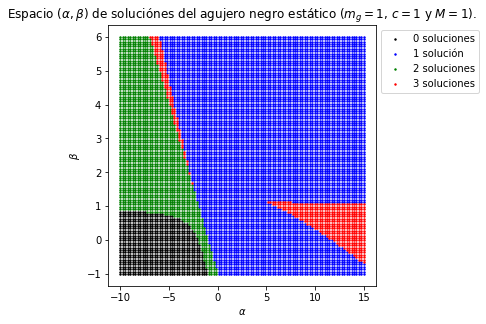

In [ ]:
mp.figure(figsize=(4.8, 4.8))
mp.scatter(sols_M1_0[0][0],sols_M1_0[0][1],s=2,c="k", label="0 soluciones")
mp.scatter(sols_M1_0[1][0],sols_M1_0[1][1],s=2,c="b", label="1 solución")
mp.scatter(sols_M1_0[2][0],sols_M1_0[2][1],s=2,c="g", label="2 soluciones")
mp.scatter(sols_M1_0[3][0],sols_M1_0[3][1],s=2,c="r", label="3 soluciones")

mp.xlabel(r"$\alpha$")
mp.ylabel(r"$\beta$")

mp.title("Espacio ($\\alpha,\\beta$) de soluciónes del agujero negro estático ($m_g=1$, $c=1$ y $M=1$).")

mp.legend(bbox_to_anchor=(1,1))

Ahora, se graficó las regiones con diferente número de soluciónes, como en el caso anterior, pero con $M=2$, $m_g \text{ y } c$ conservan el mismo valor de antes , es decri, $m_g = c = 1$.

In [ ]:
sols_M2=findSolutions(sp.expand(subs(r*f,(m_g,1),(c,1),(m,2))),3,[alpha,alphas],[beta,betas])

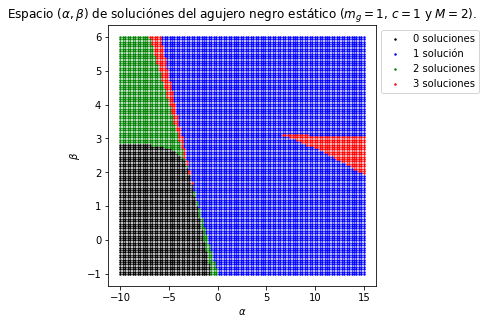

In [ ]:
mp.figure(figsize=(4.8, 4.8))
mp.scatter(sols_M2[0][0],sols_M2[0][1],s=2,c="k", label="0 soluciones")
mp.scatter(sols_M2[1][0],sols_M2[1][1],s=2,c="b", label="1 solución")
mp.scatter(sols_M2[2][0],sols_M2[2][1],s=2,c="g", label="2 soluciones")
mp.scatter(sols_M2[3][0],sols_M2[3][1],s=2,c="r", label="3 soluciones")

mp.xlabel(r"$\alpha$")
mp.ylabel(r"$\beta$")

mp.title("Espacio ($\\alpha,\\beta$) de soluciónes del agujero negro estático ($m_g=1$, $c=1$ y $M=2$).")

mp.legend(bbox_to_anchor=(1,1))

Para $M=3$ se obtiene

In [ ]:
sols_M3=findSolutions(sp.expand(subs(r*f,(m_g,1),(c,1),(m,3))),3,[alpha,alphas],[beta,betas])

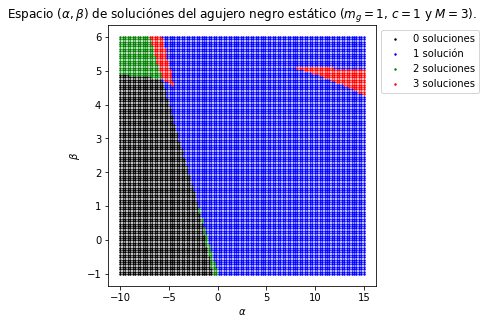

In [ ]:
mp.figure(figsize=(4.8, 4.8))
mp.scatter(sols_M3[0][0],sols_M3[0][1],s=2,c="k", label="0 soluciones")
mp.scatter(sols_M3[1][0],sols_M3[1][1],s=2,c="b", label="1 solución")
mp.scatter(sols_M3[2][0],sols_M3[2][1],s=2,c="g", label="2 soluciones")
mp.scatter(sols_M3[3][0],sols_M3[3][1],s=2,c="r", label="3 soluciones")

mp.title("Espacio ($\\alpha,\\beta$) de soluciónes del agujero negro estático ($m_g=1$, $c=1$ y $M=3$).")

mp.xlabel(r"$\alpha$")
mp.ylabel(r"$\beta$")

mp.legend(bbox_to_anchor=(1,1))
mp.show()

Mientras que para $M=4$ se obtiene que

In [ ]:
sols_M4=findSolutions(sp.expand(subs(r*f,(m_g,1),(c,1),(m,4))),3,[alpha,alphas],[beta,betas])

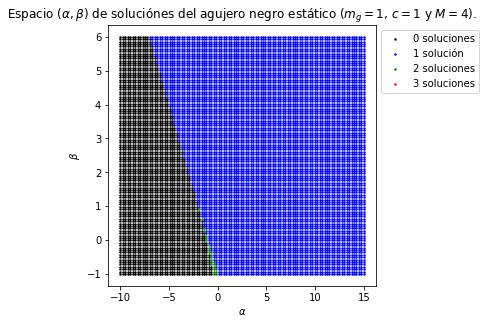

In [ ]:
mp.figure(figsize=(4.8, 4.8))
mp.scatter(sols_M4[0][0],sols_M4[0][1],s=2,c="k", label="0 soluciones")
mp.scatter(sols_M4[1][0],sols_M4[1][1],s=2,c="b", label="1 solución")
mp.scatter(sols_M4[2][0],sols_M4[2][1],s=2,c="g", label="2 soluciones")
mp.scatter(sols_M4[3][0],sols_M4[3][1],s=2,c="r", label="3 soluciones")

mp.title("Espacio ($\\alpha,\\beta$) de soluciónes del agujero negro estático ($m_g=1$, $c=1$ y $M=4$).")

mp.xlabel(r"$\alpha$")
mp.ylabel(r"$\beta$")

mp.legend(bbox_to_anchor=(1,1))
mp.show()

---

Un análisis que resulta interesante, es comparar el número máximo de soluciones para dos valores distintos de masa, en la siguiente gráfica se tienen las regiónes donde hay tres soluciones de la ecuación de horizonte de eventos para $M=1$ (rojo) y $M=2$ (azul), la región superior izquierda es una regíon que los dos valores de masa comparten.

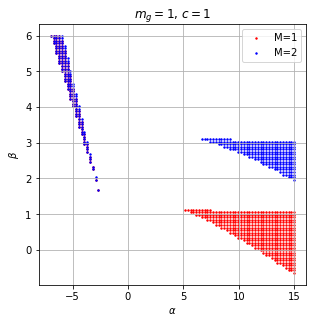

In [ ]:
mp.figure(figsize=(4.8, 4.8))
mp.scatter(sols_M1_0[3][0],sols_M1_0[3][1],s=2,c="r",label="M=1")
mp.scatter(sols_M2[3][0],sols_M2[3][1],s=2,c="b",label="M=2")
mp.grid(True)
mp.title("$m_g=1$, $c=1$")

mp.xlabel(r"$\alpha$")
mp.ylabel(r"$\beta$")

mp.legend(bbox_to_anchor=(1,1))
mp.show()

También, usando la función ```findSolutions()``` se realizó una gráfica para una región ampliada de $(\alpha,\beta)$ con los parámetros $M=c=m_g=1$, obteniendo así

In [ ]:
sols_M1_1=findSolutions(f_1,3,[alpha,np.linspace(-50,50,100)],[beta,np.linspace(-50,50,100)])

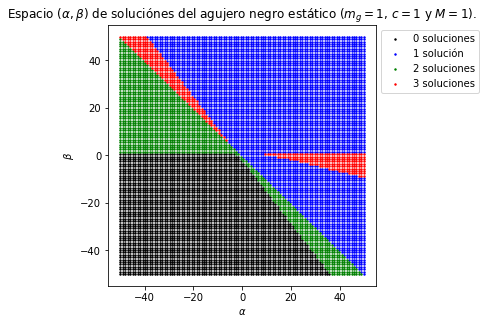

In [ ]:
mp.figure(figsize=(4.8, 4.8))
mp.scatter(sols_M1_1[0][0],sols_M1_1[0][1],s=2,c="k", label="0 soluciones")
mp.scatter(sols_M1_1[1][0],sols_M1_1[1][1],s=2,c="b", label="1 solución")
mp.scatter(sols_M1_1[2][0],sols_M1_1[2][1],s=2,c="g", label="2 soluciones")
mp.scatter(sols_M1_1[3][0],sols_M1_1[3][1],s=2,c="r", label="3 soluciones")

mp.title("Espacio ($\\alpha,\\beta$) de soluciónes del agujero negro estático ($m_g=1$, $c=1$ y $M=1$).")

mp.xlabel(r"$\alpha$")
mp.ylabel(r"$\beta$")

mp.legend(bbox_to_anchor=(1,1))
mp.show()

## 1.4. Comportamiento de la función F(r) respecto de r

Para comprobar la existencia de cierto número de soluciones dada un valor en la región se puede estudiar el comportamiento de $F(r)$ respecto de $r$ dados valores de $\alpha$ y $\beta$.

Inicialmente, para comprobar la existencia de tres soluciones se tomaron los valores de $\alpha=10$ y $\beta=0.5$, que corresponden a la gráfica azul, y los valores de $\alpha = -3$ y $\beta = 2.1$, que corresponden a la gráfica de color negro. La gráfica de color rojo corresponde a $m_g=0$, es decir, el agujero negro de Schwarzschild.

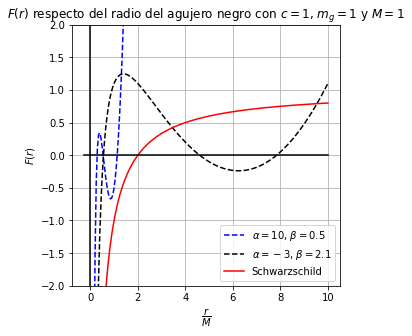

In [ ]:
r_graf=np.linspace(0.1,10,200)
mp.figure(figsize=(4.8, 4.8))
mp.grid(True)
mp.plot(*graf(f,10,0.5,r_graf),"b--", label=r"$\alpha=10$, $\beta=0.5$")
mp.plot(*graf(f,-3,2.1,r_graf),"k--", label=r"$\alpha=-3$, $\beta=2.1$")
mp.plot(*graf(f,0,-1,r_graf,cVal=0),"r-",label="Schwarzschild")
mp.ylim(-2,2)
mp.ylabel("$F(r)$")
mp.xlabel(r"$\dfrac{r}{M}$")
mp.title("$F(r)$ respecto del radio del agujero negro con $c=1$, $m_g=1$ y $M=1$")
mp.legend()
mp.plot([-0.25,10],[0,0],"k-")
mp.plot([0,0],[2,-8],"k-")

Para corroborar la existencia de dos soluciones se tomaron los valores de $\alpha=-5$ y $\beta=2$, que corresponden a la gráfica azul, y los valores de $\alpha = -7$ y $\beta = 5$, que corresponden a la gráfica de color negro. La gráfica de color rojo corresponde a $m_g=0$, es decir, el agujero negro de Schwarzschild.

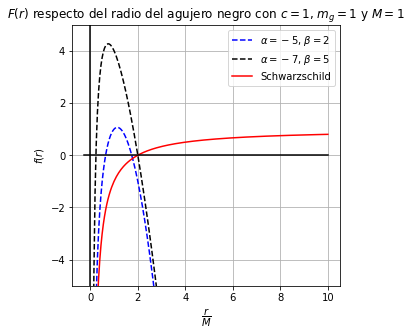

In [ ]:
mp.figure(figsize=(4.8, 4.8))
mp.grid(True)
mp.plot(*graf(f,-5,2,r_graf),"b--", label=r"$\alpha=-5$, $\beta=2$")
mp.plot(*graf(f,-7,5,r_graf),"k--", label=r"$\alpha=-7$, $\beta=5$")
mp.plot(*graf(f,0,-1,r_graf,cVal=0),"r-",label="Schwarzschild")
mp.ylim(-5,5)
mp.ylabel("$f(r)$")
mp.xlabel(r"$\dfrac{r}{M}$")
mp.title("$F(r)$ respecto del radio del agujero negro con $c=1$, $m_g=1$ y $M=1$")
mp.legend()
mp.plot([-0.25,10],[0,0],"k-")
mp.plot([0,0],[-5,5],"k-")

Para corroborar la existencia de una solución se tomaron los valores de $\alpha=0$ y $\beta=0$, que corresponden a la gráfica azul, y los valores de $\alpha = \dfrac{1}{2}$ y $\beta = 1$, que corresponden a la gráfica de color negro. La gráfica de color rojo corresponde a $m_g=0$, es decir, el agujero negro de Schwarzschild.

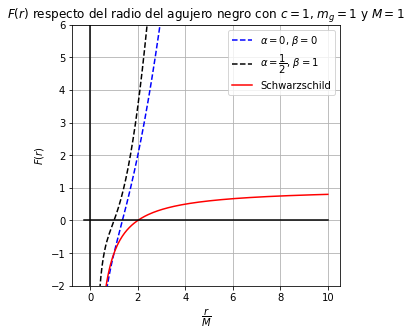

In [ ]:
mp.figure(figsize=(4.8, 4.8))
mp.grid(True)
mp.plot(*graf(f,0,0,r_graf),"b--", label=r"$\alpha=0$, $\beta=0$")
mp.plot(*graf(f,1/2,1,r_graf),"k--", label=r"$\alpha=\dfrac{1}{2}$, $\beta=1$")
mp.plot(*graf(f,0,-1,r_graf,cVal=0),"r-",label="Schwarzschild")
mp.ylim(-2,6)
mp.ylabel("$F(r)$")
mp.xlabel(r"$\dfrac{r}{M}$")
mp.title("$F(r)$ respecto del radio del agujero negro con $c=1$, $m_g=1$ y $M=1$")
mp.legend()
mp.plot([-0.25,10],[0,0],"k-")
mp.plot([0,0],[-2,6],"k-")

Para corroborar la existencia de singularidades desnudas se tomaron los valores de $\alpha=-5$ y $\beta=0$, que corresponden a la gráfica azul, y los valores de $\alpha = -2$ y $\beta = -\dfrac{1}{2}$, que corresponden a la gráfica de color negro. La gráfica de color rojo corresponde a $m_g=0$, es decir, el agujero negro de Schwarzschild.

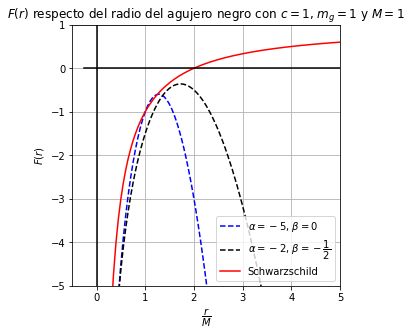

In [ ]:
mp.figure(figsize=(4.8, 4.8))
mp.grid(True)
mp.plot(*graf(f,-5,0,r_graf),"b--", label=r"$\alpha=-5$, $\beta=0$")
mp.plot(*graf(f,-2,-0.5,r_graf),"k--", label=r"$\alpha=-2$, $\beta=-\dfrac{1}{2}$")
mp.plot(*graf(f,0,-1,r_graf,cVal=0),"r-",label="Schwarzschild")
mp.ylim(-5,1)
mp.xlim(-0.5,5)
mp.ylabel("$F(r)$")
mp.xlabel(r"$\dfrac{r}{M}$")
mp.title("$F(r)$ respecto del radio del agujero negro con $c=1$, $m_g=1$ y $M=1$")
mp.legend()
mp.plot([-0.25,10],[0,0],"k-")
mp.plot([0,0],[-5,1],"k-")

#2. Termodinámica

Otra característica que resulta de interés en algunas ocasiones es el estudio del comportamiento termodinámico del agujero negro. En especial, la gravedad superficial $\kappa$, la cual está relacionada con la temperatura y la entropía. Para la solución estática de agujero negro, se asumirá que el agujero negro es un sistema aislado, es decir, no hay ningún tipo transferencia de partículas, ni creación ni aniquilación.

## 2.1. Gravedad superficial $\kappa$

De la ecuación 

\begin{equation}
g^{rr} = 0,
\end{equation}

la cual implica que 

\begin{equation}
  1-\dfrac{2M}{r_+}+\dfrac{\Lambda}{3}r_+^2+\gamma r_++\zeta=0,
\end{equation}

con $r_+$ la solución de horizonte de eventos. Reescribiendo la ecuación anterior, se encuentra la forma de la masa del agujero negro $M$ como sigue

\begin{equation}
    M=\dfrac{r_+}{2}\left(1+\dfrac{\Lambda}{3}r_+^2+\gamma r_++\zeta\right).
\end{equation}

Por tanto, se inicializan las variables termodinámicas del agujero negro usando la función ```symbols()``` del módulo ```Sympy```.

In [18]:
kappa, T, S, r_plus = sp.symbols("\\kappa T S r_+")

Luego, se calcula el valor de la masa en términos de los parámetros $\alpha$ y $\beta$, como sigue

In [19]:
M=r_plus/2*(1+(Lambda/3)*r_plus**2+gamma*r_plus+zeta)
M

Por otro lado, la gravedad superficial $\kappa$ para un agujero negro esféricamente simétrico y estático viene dada por la expresión $\kappa=\dfrac{F'(r_+)}{2}$ donde $F'(r)$ corresponde a la derivada total de la función $F$. Es decir,

\begin{equation}
    \kappa=\dfrac{1}{2r_+}\left(1+\Lambda r_+^2+2\gamma r_++\zeta\right).
\end{equation}

Usando la definición anterior y usando el método ```diff()``` de ```Sympy``` se obtiene $\kappa$ en términos de $\alpha \text{ y }\beta$ 

In [24]:
kappa=((diff(f,r)/2).subs(m,M)).subs(r,r_plus)
kappa

Dado que la gravedad superficial no depende de ningún parámetro además de $r_+$ esta es constante en todo el horizonte de eventos, es decir, se cumple la ley cero de la termodinámica de agujeros negros.

## 2.2. Temperatura

En general, para cualquier agujero negro se cumple que 

\begin{equation}
    T=\dfrac{\kappa}{2},
\end{equation}
con $\kappa$ la gravedad superficial. Por tanto, la temperatura queda expresada como 

\begin{equation}
    T=\dfrac{1}{4\pi r_+}\left(1+\Lambda r_+^2+2\gamma r_++\zeta\right),
\end{equation}
Tomando el límite $m_g\rightarrow 0$ se tiene $T=\dfrac{1}{4\pi r_+}$, recuperando la temperatura para el agujero negro de Schwarzschild. En términos de $\alpha$ y $\beta$ queda escrita como

In [25]:
T=kappa/(2*sp.pi)
T

Debido a la forma de la temperatura esta presenta un mínimo local $T_{(min)}$, a través del cual se puede asegurar la condición de $T>0$. Derivando la ecuación de la temperatura respecto de $r_+$ y encontrando el valor de $r_+$ para el cual se tiene $T_{(min)}$, se encuentra que

\begin{equation}
    r_{+(min)}=\sqrt{\dfrac{1+\zeta}{\Lambda}}=\sqrt{\dfrac{1+\alpha+3\beta}{3(1+\alpha+\beta)}}.
\end{equation}
Es decir, 

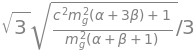

In [ ]:
r_min=sp.sqrt((1+zeta)/Lambda)
r_min

Luego, reemplazando $r_+ = r_{+(min)}$ en la ecuación de la temperatura, se llega al valor de temperatura mínimo, este queda dado como

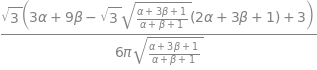

In [ ]:
T_min=simplify(((1/(2*r_min))*(1+Lambda*r_min**2+2*gamma*r_min+zeta)).subs(m_g,1).subs(c,1)/(2*sp.pi))
T_min

Luego, es posible encontrar las regiones del espacio $(\alpha-\beta)$ donde $T_{(min)}>0$, asegurando que la temperatura para cualquier otro valor de $r>0$ no será negativo. Para esto se veríficó en cada punto de $\alpha$ y $\beta$ dado un ontervalo de estos dos puntos, eso se corroboró a través de la siguiente celda

In [ ]:
alpha_T=[[],[],[]]
beta_T=[[],[],[]]
for a in np.linspace(-6,6,100):
  for b in np.linspace(-1,2,100):
    TGreaterThan0=False
    rGreaterThan0=False
    Temperature=subs(T_min,(alpha,a),(beta,b))
    TemperaturePlusDelta=subs(T,(c,1),(m_g,1),(alpha,a),(beta,b),(r_plus,subs(r_min,(c,1),(m_g,1),(alpha,a),(beta,b))+0.01))
    radMinimum=subs(r_min,(alpha,a),(beta,b),(m_g,1),(c,1))
    if Temperature.is_real and TemperaturePlusDelta.is_real:
      if(Temperature>0 and TemperaturePlusDelta>Temperature):
        TGreaterThan0=True
    if radMinimum.is_real:
      if radMinimum>0:
        rGreaterThan0=True
    if(rGreaterThan0 and TGreaterThan0):
      alpha_T[2].append(a)
      beta_T[2].append(b)
    elif(TGreaterThan0):
      alpha_T[0].append(a)
      beta_T[0].append(b)
    elif(rGreaterThan0):
      alpha_T[1].append(a)
      beta_T[1].append(b)

La celda anterior permite encontrar las regiones donde tanto $T_{
(min)}>0$ y $r_{+(min)}>0$, en la siguiente figura se encuentran las regiones donde $r_{+(min)}>0$, en azul, y donde tanto $r_{+(min)}$ como $T_{(min)}$ son positivos al tiempo, en rojo.

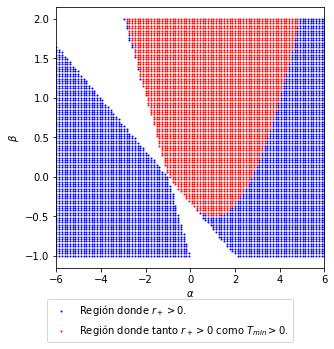

In [ ]:
mp.figure(figsize=(4.8, 4.8))
mp.scatter(np.array(alpha_T[1]),np.array(beta_T[1]),s=1,c="b", label = "Región donde $r_+>0$.")
mp.scatter(np.array(alpha_T[2]),np.array(beta_T[2]),s=1,c="r", label ="Región donde tanto $r_+>0$ como $T_{min}>0$.")
mp.xlim(-6,6)
mp.ylabel("$\\beta$")
mp.xlabel("$\\alpha$")
mp.legend(bbox_to_anchor=(0.9,-0.1))
mp.show()

Para corroborar la gráfica anterior se realizó el gráfico para la temperatura dados valores de $\alpha \text{ y } \beta$.

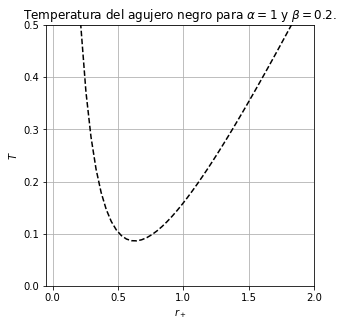

In [26]:
mp.figure(figsize=(4.8, 4.8))
mp.grid(True)
mp.plot(*graf(T.subs(r_plus,r),1,0.2,np.linspace(0.1,2)),"k--")
mp.title(r"Temperatura del agujero negro para $\alpha=1$ y $\beta=0.2$.")
mp.ylabel("$T$")
mp.xlabel("$r_+$")
mp.ylim(0,0.5)
mp.xlim(-0.05,2)
mp.show()

En la anterior gráfica se corrobora que tanto $r_{+(\min)}$ como $T_{(min)}$ son mayores a cero, para valores de $\alpha$ y $\beta$ en la región roja.

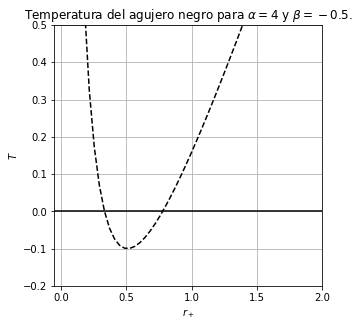

In [27]:
mp.figure(figsize=(4.8, 4.8))
mp.grid(True)
mp.plot(*graf(T.subs(r_plus,r),4,-1/2,np.linspace(0.1,2)),"k--")
mp.plot([-1,3],[0,0],"k-")
mp.title(r"Temperatura del agujero negro para $\alpha=4$ y $\beta=-0.5$.")
mp.ylabel("$T$")
mp.xlabel("$r_+$")
mp.ylim(-0.2,0.5)
mp.xlim(-0.05,2)
mp.show()

Mientras que en la anterior gráfica se corrobora que a pesar de que $r_{+(\min)}$ es no negativa, $T_{(min)}$ es menor a cero, para valores de $\alpha$ y $\beta$ en la región azul.